In [6]:
from utils import Read_S3_Data
import rasterio as rs 
import matplotlib.pyplot as plt
import numpy as np

In [22]:
bucket = 'sagemaker-essential-energy-vegetation-management'
prefix = 'EE_data/SatelliteImagery/2023/Baryugil/'
s3_obj = Read_S3_Data(bucket_name=bucket, folder_prefix=prefix)
file_key = s3_obj.get_file_s3_object('10300100EFC6CA00-visual.tif')['Key']
file_key

'EE_data/SatelliteImagery/2023/Baryugil/10300100EFC6CA00-visual.tif'

In [23]:
fp = file_key
with rs.open(fp) as src:
    window = rs.windows.Window(col_off=13500, row_off=11800,width=1200, height=1200)
    red=src.read(1,window=window)
    green=src.read(2,window=window)
    blue=src.read(3,window=window)
    # nir=src.read(5,window=window)

# red_normalized = normalize(red, 0.05, 99.95)
# green_normalized = normalize(green, 0.05, 99.95)
# blue_normalized = normalize(blue, 0.05, 99.95)

rgb_image = np.dstack((red, green, blue))

plt.imshow(rgb_image)
plt.title('RGB Composite Image')
plt.axis('off')
plt.show()

RasterioIOError: EE_data/SatelliteImagery/2023/Baryugil/10300100EFC6CA00-visual.tif: No such file or directory

In [18]:
def normalize(band, lower_percent, upper_percent):
    """Normalize a band to 0-255 for better visualization"""
    band_min, band_max = np.percentile(band, lower_percent), np.percentile(band, upper_percent)
    normalized = 255 * (band-band_min) / (band_max-band_min)
    return normalized.astype(np.uint8)
band1 = normalize(band1,0.05,0.95)
band2 = normalize(band2,0.05,0.95)
band3 = normalize(band3,0.05,0.95)
rgb_image = np.dstack((band1,band2,band3))
print(rgb_image.shape)

(1200, 1200, 3)


/tmp/ipykernel_11889/1891766548.py:5: RuntimeWarning: invalid value encountered in cast
  return normalized.astype(np.uint8)


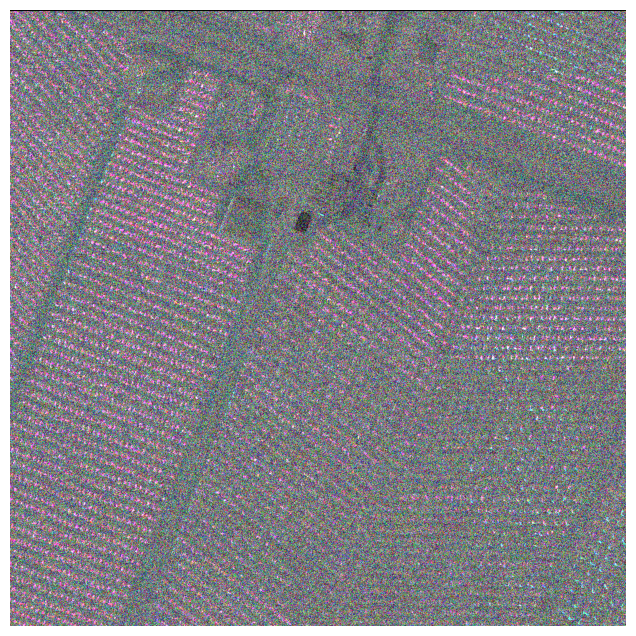

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()